# Data Visualization-- COVID19

In [1]:
print('----------')
print('Visualizing all COVID 19 Confirmed, Deaths, and Recovered Cases until March 27th')
print('----------')

----------
Visualizing all COVID 19 Confirmed, Deaths, and Recovered Cases until March 27th
----------


In [2]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
from matplotlib import figure
import numpy as np
import pandas as pd
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import plotly
import plotly.offline as py

In [3]:
#Read in the data
#All confirmed cases till March 27
df = pd.read_csv('CONFIRMED_CASES.csv')

In [4]:
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,22,22,22,24,24,40,40,74,84,94
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,55,59,64,70,76,89,104,123,146,174
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,60,74,87,90,139,201,230,264,302,367
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,39,39,53,75,88,113,133,164,188,224
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,1,2,2,3,3,3,4


In [5]:
print('----------')
print('Visualization 1: Basemap of World of Confirmed COVID 19 Cases')
print('----------')

----------
Visualization 1: Basemap of World of Confirmed COVID 19 Cases
----------


In [6]:
#Preprocessing the data
lat_y = df['Lat'].tolist()
long_x = df['Long'].tolist()
size_bubble = df['3/26/20'].tolist()

/Users/ramvegiraju/opt/anaconda3/envs/py3-TF2.0/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.

/Users/ramvegiraju/opt/anaconda3/envs/py3-TF2.0/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning:


The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.



Text(0.5, 1.0, 'COVID-19 Confirmed Cases from 1/22/20 to 3/27/20')

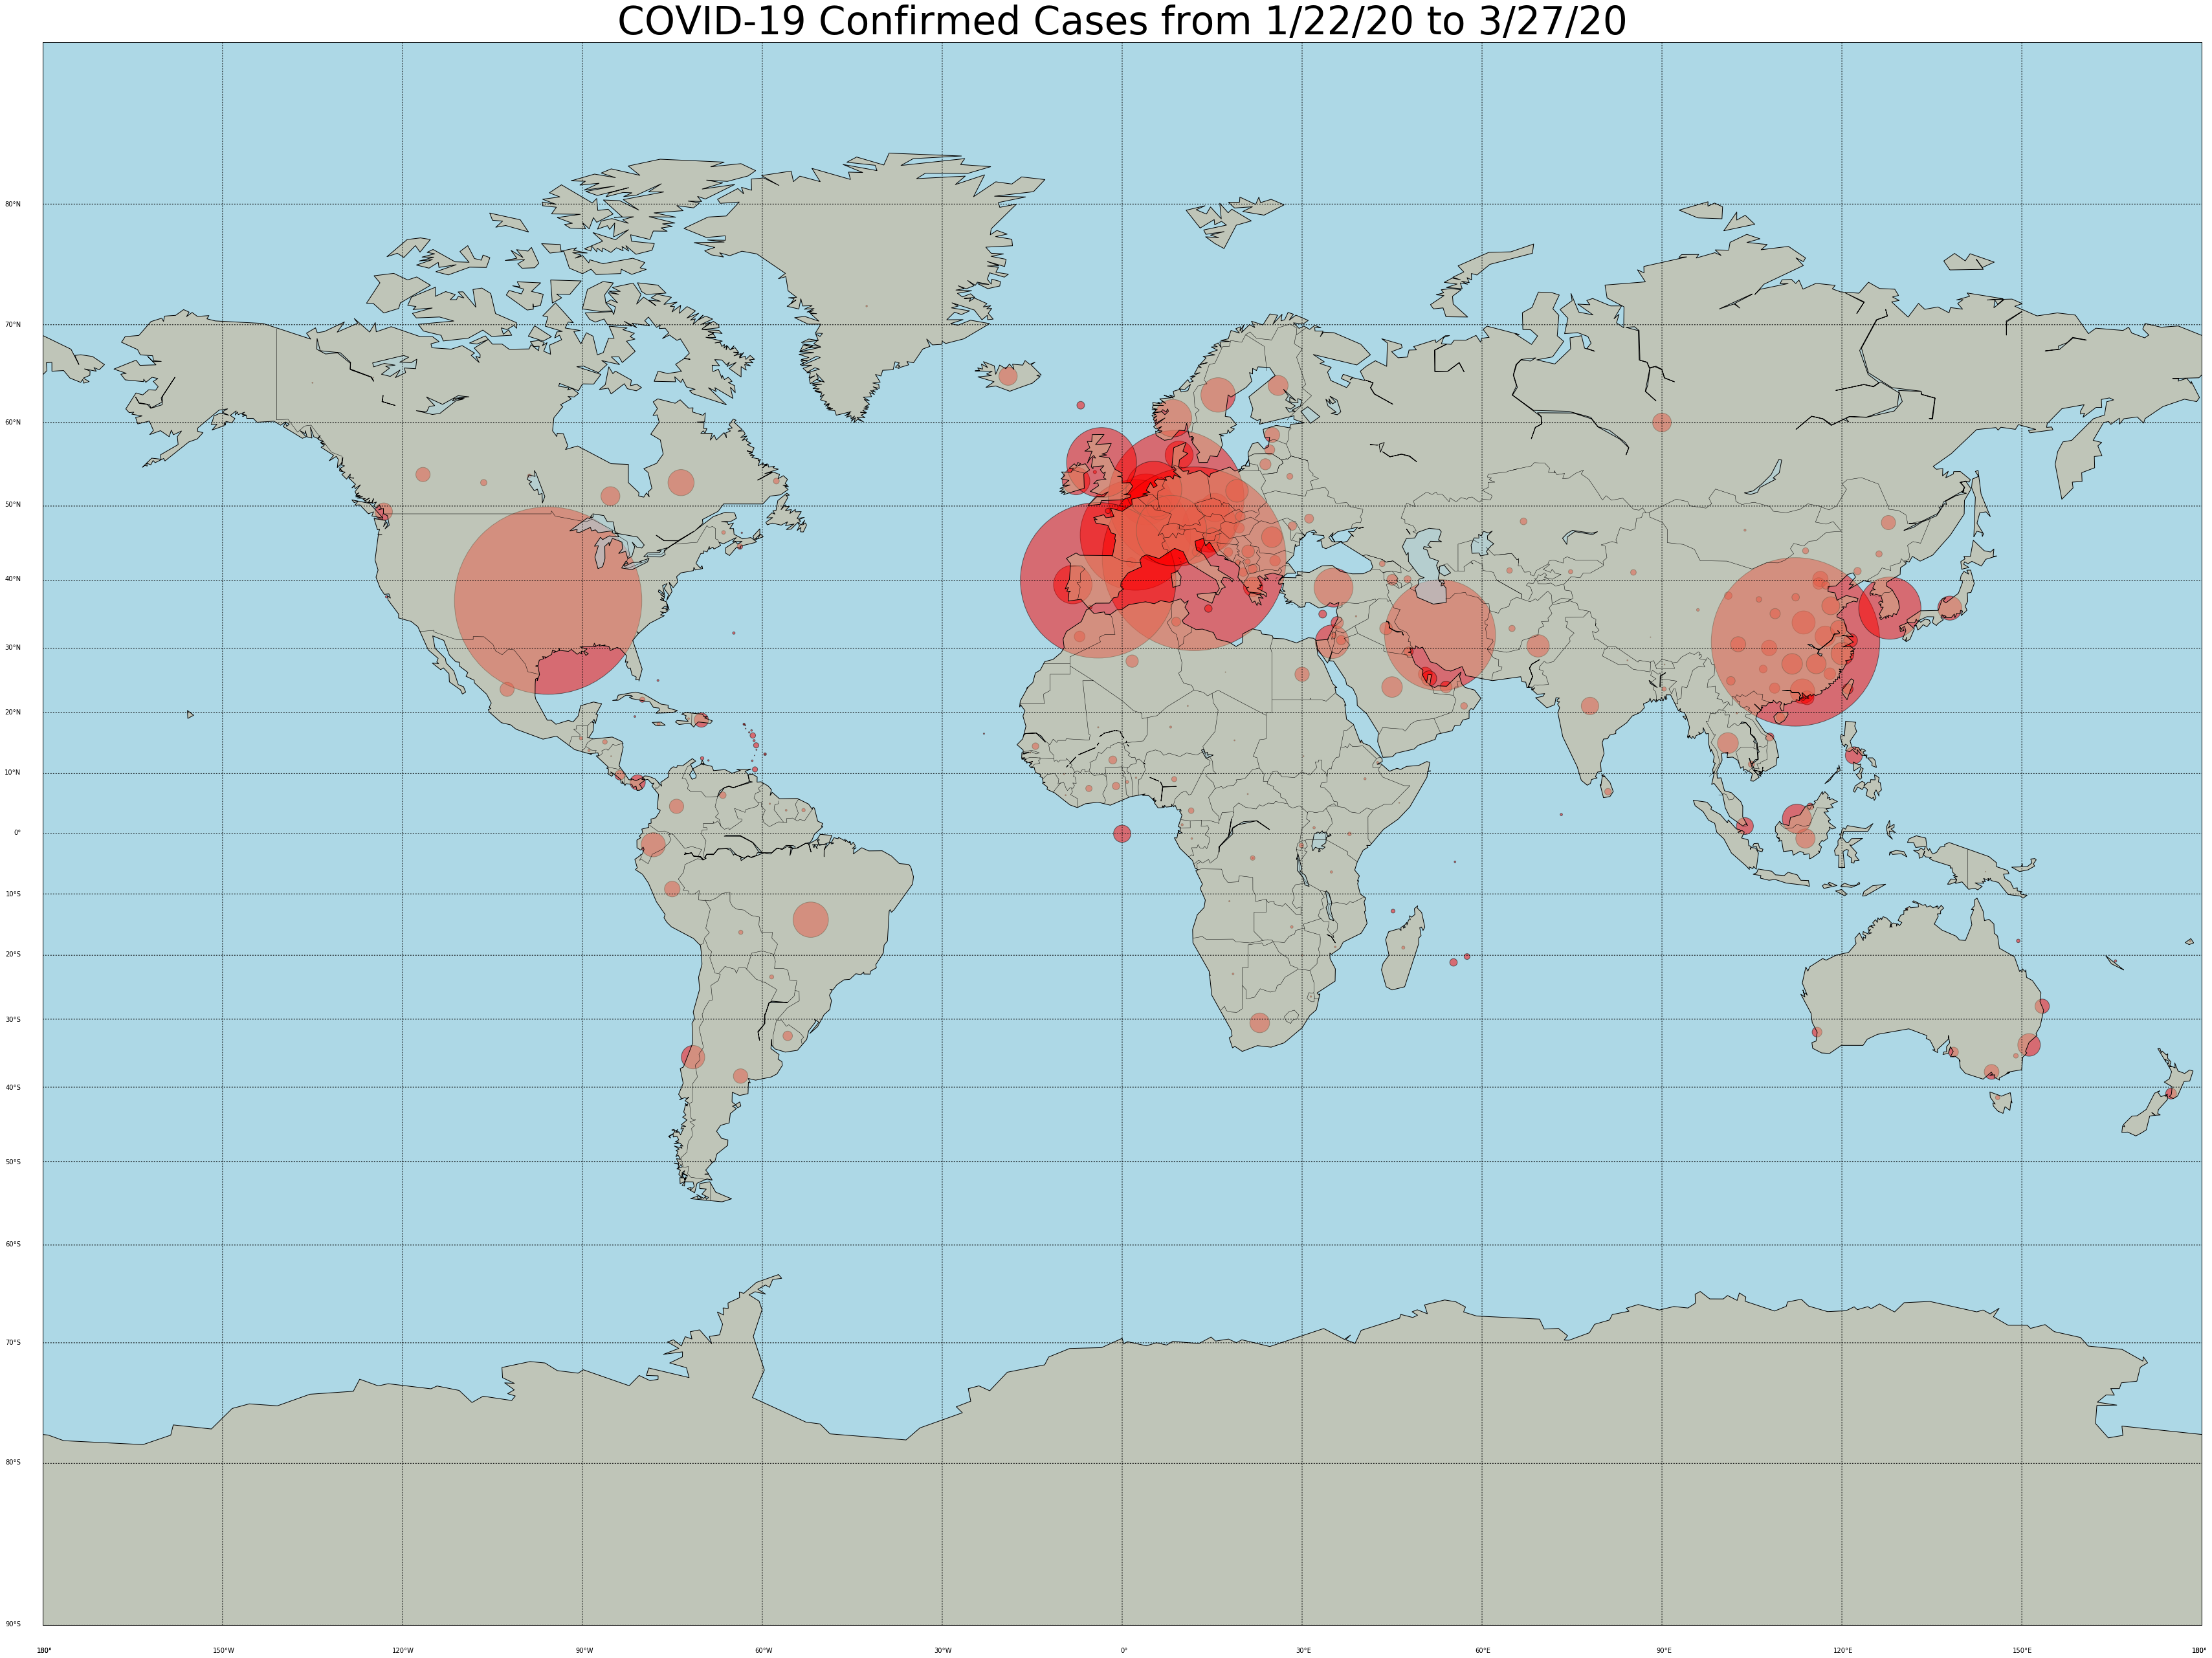

In [7]:
#Creating a base map
m = Basemap(projection='mill',
           llcrnrlat = -90,
           urcrnrlat = 90,
           llcrnrlon = -180,
           urcrnrlon = 180,
           resolution = 'c')

fig = plt.figure(figsize=(90,45))
m.drawcoastlines()
m.drawcountries(color='black') #set's boundaries of countries to black
m.fillcontinents(color='tan',lake_color='lightblue', alpha=0.5)
m.drawmapboundary(fill_color='lightblue')

#to draw grid lines use np.arange(start,stop,step)
m.drawparallels(np.arange(-90,90,10),labels=[1,0,0,0],dashes=[2,2]) #latitude
m.drawmeridians(np.arange(-180,180,30),labels=[0,0,0,1],dashes=[2,2]) #longitude
m.scatter(long_x,lat_y,latlon=True, s=size_bubble, c='red', marker='o',alpha=0.5,edgecolor='k')

plt.title("COVID-19 Confirmed Cases from 1/22/20 to 3/27/20", fontsize = 60)
#fig.savefig('COVID19_Basemap.png')
#fig.savefig('COVID19_Basemap.pdf')

In [8]:
#Daily data accumulated through March 27
#This dataset contains Confirmed, Recovered, and Deaths
df2 = pd.read_csv('03-27-2020.txt',delimiter=',')

In [9]:
df2.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-03-27 22:14:55,34.223334,-82.461707,4,0,0,0,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-03-27 22:14:55,30.295065,-92.414197,8,1,0,0,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-03-27 22:14:55,37.767072,-75.632346,2,0,0,0,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-03-27 22:14:55,43.452658,-116.241552,54,0,0,0,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-03-27 22:14:55,41.330756,-94.471059,1,0,0,0,"Adair, Iowa, US"


In [10]:
print('----------')
print('Visualization 2: Piechart of COVID 19 Infected Rates Per Country')
print('----------')

----------
Visualization 2: Piechart of COVID 19 Infected Rates Per Country
----------


In [11]:
#Normalizing data for visualizations
mean = df2['Confirmed'].mean()
normalized_Confirmed = [value/df2['Confirmed'].mean() + 10 for value in  df2['Confirmed']]
normalized_Deaths = [value/df2['Confirmed'].mean()+3 if value != 0  else value for value  in df2['Deaths']]
normalized_Recovered = [value/df2['Confirmed'].mean() + 3 if value != 0  else value for value  in df2['Recovered']]

hoverdata1 = df2['Country_Region'] + " - "+ ['Confirmed cases: ' + str(v) for v in df2['Confirmed'].tolist()]
hoverdata2 = df2['Country_Region'] + " - "+ ['Death: ' + str(v) for v in df2['Deaths'].tolist()]
hoverdata3 = df2['Country_Region'] + " - "+ ['Recovered: ' + str(v) for v in df2['Recovered'].tolist()]

In [12]:
fig = make_subplots()

In [13]:
pip install plotly==4.5.4

Note: you may need to restart the kernel to use updated packages.


In [27]:
#needed to save figure as a .png file
#pip install psutil

In [14]:
import matplotlib.pyplot as plt
import plotly.express as px
fig = px.pie(df2, values='Confirmed', names='Country_Region',
             title='Infected COVID rates across Countries',
              hover_data=['Province_State'], labels={'Province_State':'Province_State'})
fig.update_traces(textposition='inside')
#fig = plt.figure(figsize=(90,45))
fig.show()
import plotly.tools as tls
#tls.get_ember()
#plotly.offline.plot(fig, filename='file.html') #embed into HTML file
#import chart_studio.tools as tls

#fig.savefig('PieChart.png')
#fig.write_image("PieChartInfectedRates.png")

In [15]:
print('----------')
print('Visualization 3: Line Plot of COVID-19 through March.27.2020')
print('----------')

----------
Visualization 3: Line Plot of COVID-19 through March.27.2020
----------


In [17]:
Confirmed_df = pd.read_csv('time_series_covid19_confirmed_global.txt',delimiter=',')
#Confirmed_df.head()
Confirmed = Confirmed_df.iloc[:,4:]
#Confirmed.head()
Confirmed.dtype()
#daily_cases = Confirmed(axis=0)
#daily_cases.index = pd.to_datetime(daily_cases.index)
#daily_cases.head()

AttributeError: 'DataFrame' object has no attribute 'dtype'

In [18]:
print('----------')
print('Visualization 4: Comparing SARS to COVID-19')
print('----------')

----------
Visualization 4: Comparing SARS to COVID-19
----------


In [19]:
#Reading in the confirmed cases through March 27
from datetime import datetime
Confirmed_df = pd.read_csv('time_series_covid19_confirmed_global.txt',delimiter=',')
timeline = ['1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20','3/7/20',
       '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20','3/13/20',
       '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20','3/19/20',
       '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20','3/25/20',
       '3/26/20', '3/27/20']
time = [];value = [];country=[];province= []
col_value = list(Confirmed_df.columns)
for i in timeline:
    time.append(datetime.strptime(i, '%m/%d/%y'))
    value.append(Confirmed_df[i].sum())
    

newdf1 = pd.DataFrame({'Timeline':time,'Covid-19 impact':value})

In [20]:
#Deaths through March 27
Deaths_df = pd.read_csv('time_series_covid19_deaths_global.txt',delimiter=',')
timeline = ['1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20','3/7/20',
       '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20','3/13/20',
       '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20','3/19/20',
       '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20','3/25/20',
       '3/26/20', '3/27/20']
time = [];value = [];country=[];province= []
col_value = list(Deaths_df.columns)
for i in timeline:
    time.append(datetime.strptime(i, '%m/%d/%y'))
    value.append(Deaths_df[i].sum())
    

newdf2 = pd.DataFrame({'Timeline':time,'Covid-19 impact':value})

In [21]:
#Recoveries through March 27
Recovered_df = pd.read_csv('time_series_covid19_recovered_global.txt',delimiter=',')
timeline = ['1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20','3/7/20',
       '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20','3/13/20',
       '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20','3/19/20',
       '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20','3/25/20',
       '3/26/20', '3/27/20']
time = [];value = [];country=[];province= []
col_value = list(Recovered_df.columns)
for i in timeline:
    time.append(datetime.strptime(i, '%m/%d/%y'))
    value.append(Recovered_df[i].sum())
    

newdf3 = pd.DataFrame({'Timeline':time,'Covid-19 impact':value})

In [23]:
#Reading in SARS Data for comparision
SARS = pd.read_excel('sars_final.xlsx')

In [24]:
#Comparing the Confirmed Cases between COVID and SARS
fig = make_subplots(rows=1, cols=2,vertical_spacing=0.02)


fig.add_trace(
    go.Scatter(x=newdf1["Timeline"], y=newdf1["Covid-19 impact"], name = 'COVID-19'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=SARS["Date"], y=SARS["Infected"], name = 'SARS'),
    row=1, col=2
)

fig.update_xaxes(title_text="Timeline (Initial three months)")


fig.update_layout(height=400, width=1100, title_text="COVID-19 vs SARS: Confirmed Cases")
fig.show()
#fig.write_image("Confirmed_COVIDvsSARS.png")

In [23]:
#Comparing the Deaths between COVID and SARS
fig = make_subplots(rows=1, cols=2,vertical_spacing=0.02)


fig.add_trace(
    go.Scatter(x=newdf2["Timeline"], y=newdf2["Covid-19 impact"], name = 'COVID-19'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=SARS["Date"], y=SARS["Mortality"], name = 'SARS'),
    row=1, col=2
)

fig.update_xaxes(title_text="First Three Months")


fig.update_layout(height=400, width=1100, title_text="COVID-19 vs SARS: Deaths")
fig.show()
#fig.write_image("Deaths_COVIDvsSARS.png")

In [24]:
#Comparing the Recoveries between COVID and SARS
fig = make_subplots(rows=1, cols=2,vertical_spacing=0.02)


fig.add_trace(
    go.Scatter(x=newdf3["Timeline"], y=newdf3["Covid-19 impact"], name = 'COVID-19'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=SARS["Date"], y=SARS["Mortality"], name = 'SARS'),
    row=1, col=2
)

fig.update_xaxes(title_text="First Three Months")


fig.update_layout(height=400, width=1100, title_text="COVID-19 vs SARS: Recoveries")
fig.show()
#fig.write_image("Recoveries_COVIDvsSARS.png")

In [25]:
print('-----------')
print('Visualization 5: Overall Confirmed,Death, and Recoveries Multiple Line Chart of COVID-19')
print('-----------')

-----------
Visualization 5: Overall Confirmed,Death, and Recoveries Multiple Line Chart of COVID-19
-----------


In [26]:
#Multiple Line Analysis of COVID-19
#Tracking Confirmed, Deaths, Recoveries
fig = make_subplots()

fig.add_trace(
    go.Scatter(x=newdf1["Timeline"], y=newdf1["Covid-19 impact"], name = 'Confirmed'))

fig.add_trace(
    go.Scatter(x=newdf2["Timeline"], y=newdf2["Covid-19 impact"], name = 'Deaths'))

fig.add_trace(
    go.Scatter(x=newdf3["Timeline"], y=newdf3["Covid-19 impact"], name = 'Recovered'))

fig.update_xaxes(title_text="Timeline")


#fig.update_layout(height=500, width=800, title_text="Confirmed,Deaths, and Recoveries of COVID-19")
#fig.show()
#fig.write_image("Overall_Growth_COVID.png")

In [28]:
#Comparing COVID 19 to MERS
#Data for this portion credited and scraped from https://www.kaggle.com/imdevskp/covid19-vs-sars-vs-mers-vs-ebola-vs-h1n1/data#data
MERS_Country = pd.read_csv('country_count_latest_MERS.csv')
MERS_Weekly = pd.read_csv('weekly_clean_MERS.csv')

In [29]:
MERS_Country.head()

,Country,Confirmed
0,Algeria,2
1,Austria,2
2,Bahrain,1
3,China,1
4,Egypt,1


In [30]:
MERS_Weekly.head()

,Year,Week,Region,New Cases
0,2012,12,Other Countries,1
1,2012,12,Republic of Korea,0
2,2012,12,Saudi Arabia,0
3,2012,13,Other Countries,0
4,2012,13,Republic of Korea,0


In [59]:
#MERS Cases Spread on Chloropleth
fig = px.choropleth(MERS_Country, locations="Country", locationmode='country names',
                    color="Confirmed", hover_name="Country", 
                    color_continuous_scale='reds', title='MERS Cases 2012 Outbreak')
fig.update(layout_coloraxis_showscale=False)
fig.show()